### (G) Dense network

#### Instructions

Try with neural networks

1. **1-layer** dense network i.e. no hidden layer, just the input and output ones
2. **2-layer** dense network i.e. one hidden layer

**Note:** *It is up to you if you want to implement your neural networks for this and the next task with TensorFlow's low-level graph API or the Keras API.* **Our recommendation is to practise your knowledge of the Keras API, as this approach is quicker to implement, more straight forward to read and most importantly, the Keras API is since TensorFlow version 2.0 also the preferred API of TensorFlow itself.**

#### Load data

In [1]:
import numpy as np
import pandas as pd

In [2]:
with np.load('swissroads_highlevel_features.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    features_tr = npz_file['features_train']
    labels_tr = npz_file['labels_train']
    features_va = npz_file['features_valid']
    labels_va = npz_file['labels_valid']
    features_te = npz_file['features_test']
    labels_te = npz_file['labels_test']
    imgs_tr = npz_file['imgs_train']
    imgs_va = npz_file['imgs_valid']
    imgs_te = npz_file['imgs_test']

print('features_tr:', features_tr.shape)
print('labels_tr:', labels_tr.shape)
print('features_va:', features_va.shape)
print('labels_va:', labels_va.shape)
print('features_te:', features_te.shape)
print('labels_te:', labels_te.shape)
print('imgs_tr:', imgs_tr.shape)
print('imgs_va:', imgs_va.shape)
print('imgs_te:', imgs_te.shape)

features_tr: (280, 2048)
labels_tr: (280,)
features_va: (139, 2048)
labels_va: (139,)
features_te: (50, 2048)
labels_te: (50,)
imgs_tr: (280, 299, 299, 3)
imgs_va: (139, 299, 299, 3)
imgs_te: (50, 299, 299, 3)


In [3]:
X_tr = features_tr
X_va = features_va
X_te = features_te
y_tr = labels_tr
y_va = labels_va
y_te = labels_te
labels = ['bike','car','motorcycle','other','truck','van']

### Task G

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### i) single layer Dense Network (using Keras)

In [5]:
model = Sequential()
#model.add(Dense(16,activation='relu', input_dim=2048))
model.add(Dense(6, activation='softmax',input_dim=2048))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12294     
Total params: 12,294
Trainable params: 12,294
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_va_rescaled = scaler.transform(X_va)
X_te_rescaled = scaler.transform(X_te)

In [8]:
# Fit model
history = model.fit(
    x=X_tr_rescaled, y=y_tr,
    validation_data=(X_va_rescaled, y_va), batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)

Train on 280 samples, validate on 139 samples
Epoch 1/50
280/280 [==============================] - 0s 579us/step - loss: 1.0363 - acc: 0.6500 - val_loss: 0.4609 - val_acc: 0.8561
Epoch 2/50
280/280 [==============================] - 0s 46us/step - loss: 0.3337 - acc: 0.9036 - val_loss: 0.3556 - val_acc: 0.8849
Epoch 3/50
280/280 [==============================] - 0s 54us/step - loss: 0.2152 - acc: 0.9393 - val_loss: 0.3193 - val_acc: 0.8993
Epoch 4/50
280/280 [==============================] - 0s 61us/step - loss: 0.1607 - acc: 0.9500 - val_loss: 0.3024 - val_acc: 0.9065
Epoch 5/50
280/280 [==============================] - 0s 53us/step - loss: 0.1240 - acc: 0.9607 - val_loss: 0.2915 - val_acc: 0.9065
Epoch 6/50
280/280 [==============================] - 0s 64us/step - loss: 0.1001 - acc: 0.9714 - val_loss: 0.2844 - val_acc: 0.9065
Epoch 7/50
280/280 [==============================] - 0s 61us/step - loss: 0.0823 - acc: 0.9857 - val_loss: 0.2789 - val_acc: 0.9065
Epoch 8/50
280/280 [==

In [9]:
# The history object saved the scores during training
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

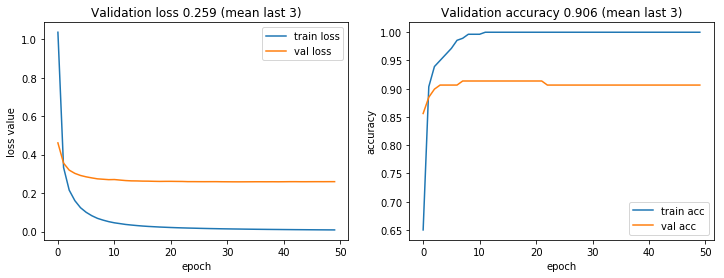

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [11]:
(test_loss, dense_1layer_accuracy) = model.evaluate(X_te_rescaled, y_te, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss))
print('Test accuracy: {:.2f}%'.format(100*dense_1layer_accuracy))

50/50 [==============================] - 0s 80us/step
Test loss: 0.18
Test accuracy: 92.00%


In [12]:
%store dense_1layer_accuracy

Stored 'dense_1layer_accuracy' (float64)


#### ii) 2-layers Dense Network (using Keras)

In [13]:
model2 = Sequential()
model2.add(Dense(24,activation='relu', input_dim=2048))
model2.add(Dense(6, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                49176     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 150       
Total params: 49,326
Trainable params: 49,326
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Define loss function, optimizer, and metrics to track during training
model2.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [15]:
# Fit model
history2 = model2.fit(
    x=X_tr_rescaled, y=y_tr,
    validation_data=(X_va_rescaled, y_va), batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)

Train on 280 samples, validate on 139 samples
Epoch 1/50
280/280 [==============================] - 0s 700us/step - loss: 1.3550 - acc: 0.5321 - val_loss: 0.5991 - val_acc: 0.8561
Epoch 2/50
280/280 [==============================] - 0s 68us/step - loss: 0.4583 - acc: 0.8929 - val_loss: 0.4309 - val_acc: 0.8993
Epoch 3/50
280/280 [==============================] - 0s 75us/step - loss: 0.2821 - acc: 0.9464 - val_loss: 0.3684 - val_acc: 0.8993
Epoch 4/50
280/280 [==============================] - 0s 82us/step - loss: 0.2044 - acc: 0.9643 - val_loss: 0.3399 - val_acc: 0.8993
Epoch 5/50
280/280 [==============================] - 0s 75us/step - loss: 0.1590 - acc: 0.9679 - val_loss: 0.3185 - val_acc: 0.9137
Epoch 6/50
280/280 [==============================] - 0s 104us/step - loss: 0.1297 - acc: 0.9821 - val_loss: 0.3050 - val_acc: 0.9137
Epoch 7/50
280/280 [==============================] - 0s 96us/step - loss: 0.1084 - acc: 0.9929 - val_loss: 0.2945 - val_acc: 0.9137
Epoch 8/50
280/280 [=

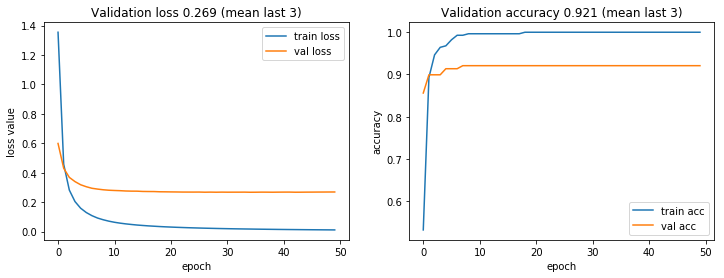

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history2.history['loss'], label='train loss')
ax1.plot(history2.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history2.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history2.history['acc'], label='train acc')
ax2.plot(history2.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history2.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [17]:
(test_loss_2, dense_2layers_accuracy) = model2.evaluate(X_te_rescaled, y_te, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss_2))
print('Test accuracy: {:.2f}%'.format(100*dense_2layers_accuracy))

50/50 [==============================] - 0s 100us/step
Test loss: 0.33
Test accuracy: 88.00%


In [18]:
%store dense_2layers_accuracy

Stored 'dense_2layers_accuracy' (float64)


#### Notes/Questions Task G (Greg)
* Shall I use 'relu' activation in one layer Keras? *(cell 5)*
* Shall I use seed to get replicable results? Can I set seed alone or need to through kernal initiliazer? *(cell 5)*
* How shall I choose the number of units for 1st layer of 2 layer dense network? *(cell 13)*
* How can we explain that 2 layers Dense network has lower accuracy than 1 layer? *(cell 17)*